# Image Filtering and Edge Detection

## 0. Preparation

In [76]:
#import neccesary libraries

from google.colab import drive
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

print("Used libraries and their versions")
print("matplotlib: {}".format(matplotlib.__version__))
print("numpy: {}".format(np.__version__))
print("cv2: {}".format(cv2.__version__))

Used libraries and their versions
matplotlib: 3.7.1
numpy: 1.23.5
cv2: 4.8.0


Change the PATH variable below for your usage!

In [77]:
PATH='/content/drive/MyDrive/McGill/ECSE415/Assignment1'
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Image Acquisition

In [78]:
#reading images from "images" directory
img1 = mpimg.imread(PATH + '/images/bottle1.jpg')
img2 = mpimg.imread(PATH + '/images/bottle2.jpg')

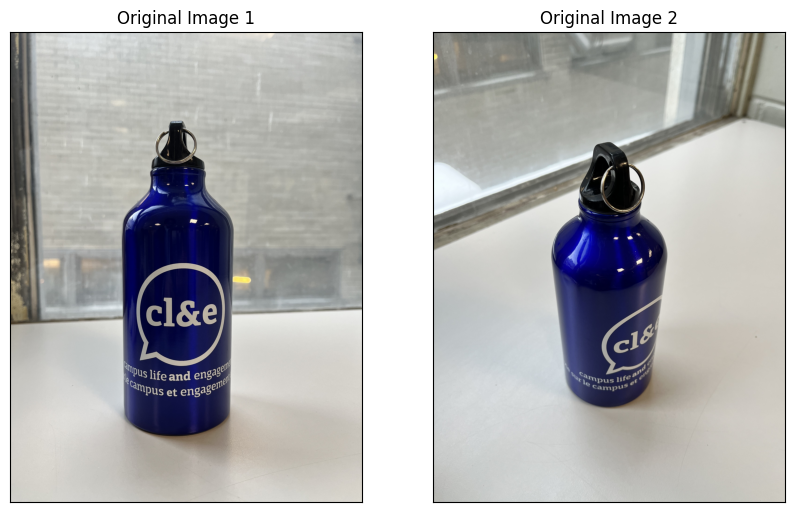

In [79]:
#plotting the original images side by side
fig1, ax1 = plt.subplots(1,2)

fig1.set_size_inches(10, 8)
plt.setp(ax1, xticks=[], yticks=[])

ax1[0].set_title("Original Image 1")
ax1[1].set_title("Original Image 2")

ax1[0].imshow(img1)
ax1[1].imshow(img2)

## 2. Convert to Grayscale

In [80]:
#taking the average of the 3 values RGB in each pixel
img1_gray = np.average(img1, axis=2)
img2_gray = np.average(img2, axis=2)

#raises an error if the grayscaled images are not reduced to 2 dimensions from 3
assert len(np.shape(img1_gray)) == 2, "img1_gray is not 2 dimensions."
assert len(np.shape(img2_gray)) == 2, "img2_gray is not 2 dimensions."

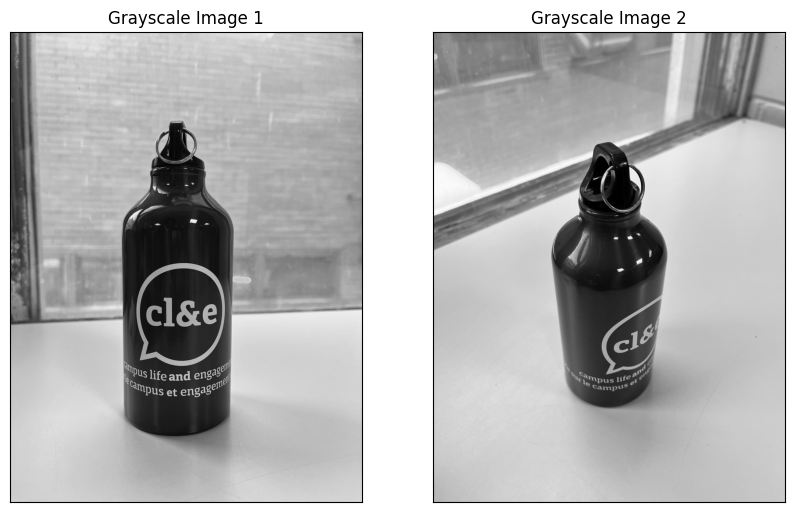

In [81]:
#plotting the grayscale images side by side
fig2, ax2 = plt.subplots(1,2)

fig2.set_size_inches(10, 8)
plt.setp(ax2, xticks=[], yticks=[])
ax2[0].set_title("Grayscale Image 1")
ax2[1].set_title("Grayscale Image 2")

ax2[0].imshow(img1_gray, cmap='gray')
ax2[1].imshow(img2_gray, cmap='gray')

## 3. Smooth the images using Gaussian smoothing

In [82]:
#gaussian smoothing with a 5x5 kernel
img1_smooth5 = cv2.GaussianBlur(img1_gray, (5,5), 0)
img2_smooth5 = cv2.GaussianBlur(img2_gray, (5,5), 0)
#gaussian smoothing with a 11x11 kernel
img1_smooth11 = cv2.GaussianBlur(img1_gray, (11,11), 0)
img2_smooth11 = cv2.GaussianBlur(img2_gray, (11,11), 0)

smooth_images = [img1_smooth5, img2_smooth5, img1_smooth11, img2_smooth11]

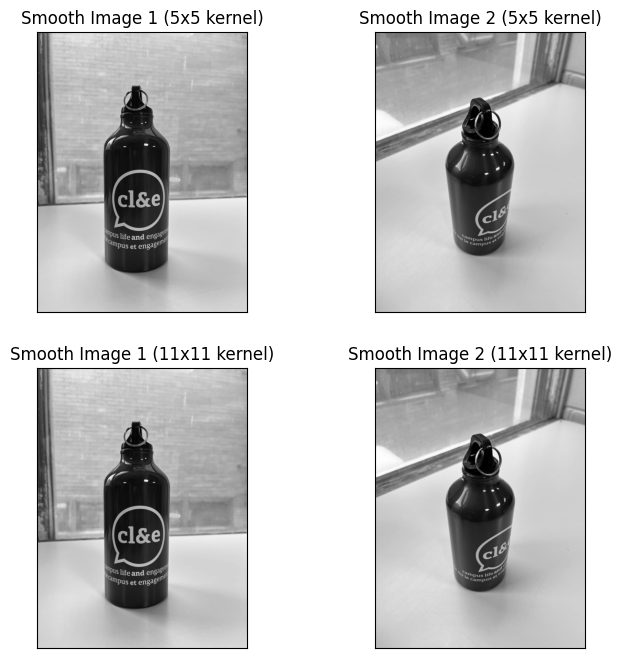

In [83]:
#plotting the smooth images in a 2x2 frame
fig3, ax3 = plt.subplots(2,2)

fig3.set_size_inches(8, 8)
plt.setp(ax3, xticks=[], yticks=[])

img_num = 0
k_sizes = [5, 11]
for row in range(2):
  for col in range(2):
    ax3[row, col].imshow(smooth_images[img_num], cmap='gray')
    plot_title = "Smooth Image {} ({}x{} kernel)".format(col+1, k_sizes[row], k_sizes[row])
    ax3[row,col].set_title(plot_title)
    img_num += 1

## 4. Compute Image Gradients

In [84]:
gradients = [[None]*4 for i in range(2)]

#applying Sobel filters to the smooth images
#each column of the list "gradients" will contain the x gradient and y gradient of the same image
for col, smooth_img in enumerate(smooth_images):
  gradX = cv2.Sobel(smooth_img, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)
  gradY = cv2.Sobel(smooth_img, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)
  gradients[0][col] = gradX
  gradients[1][col] = gradY

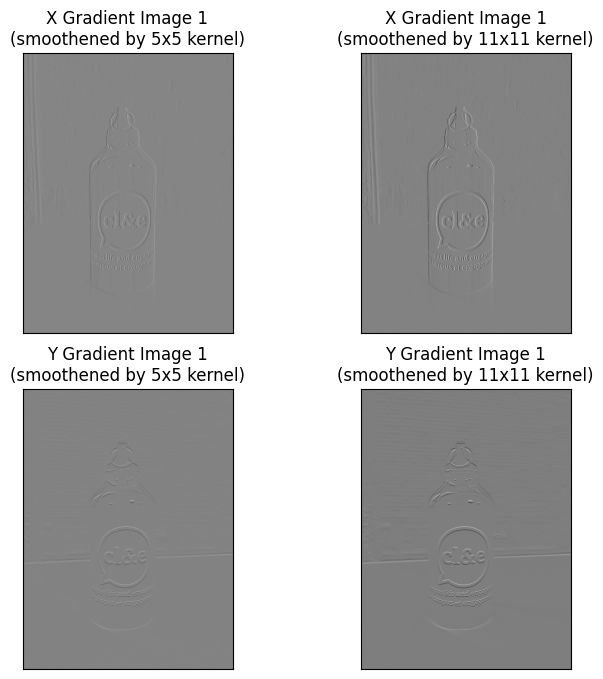

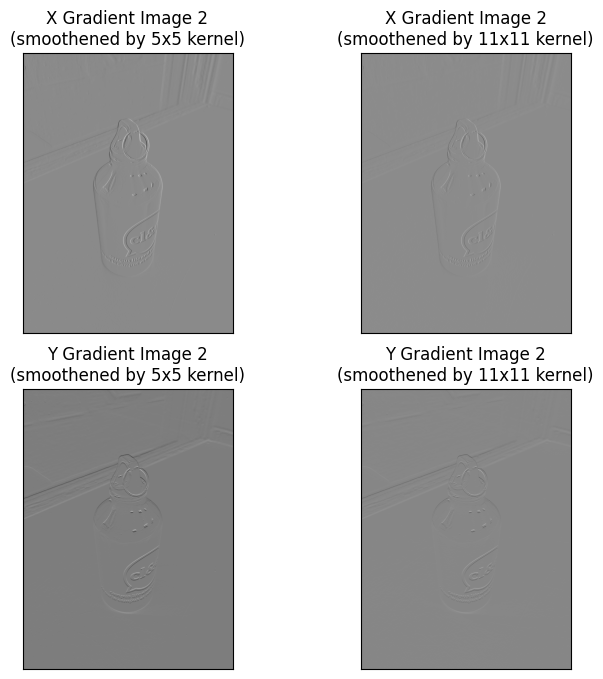

In [85]:
axis = ["X", "Y"]

#plotting the result of Sobel filtering on Image 1 in a 2x2 frame
fig4_1, ax4_1 = plt.subplots(2,2)
plt.setp(ax4_1, xticks=[], yticks=[])
fig4_1.set_size_inches(8, 8)

for row in range(2):
  for col in range(2):
    ax4_1[row,col].imshow(gradients[row][col*2], cmap='gray')
    plot_title = "{} Gradient Image 1\n(smoothened by {}x{} kernel)".format(axis[row], k_sizes[col%2], k_sizes[col%2])
    ax4_1[row,col].set_title(plot_title)

#plotting the result of Sobel filtering on Image 2 in a 2x2 frame
fig4_2, ax4_2 = plt.subplots(2,2)
plt.setp(ax4_2, xticks=[], yticks=[])
fig4_2.set_size_inches(8, 8)

for row in range(2):
  for col in range(2):
    ax4_2[row,col].imshow(gradients[row][col*2-1], cmap='gray')
    plot_title = "{} Gradient Image 2\n(smoothened by {}x{} kernel)".format(axis[row], k_sizes[col%2], k_sizes[col%2])
    ax4_2[row,col].set_title(plot_title)

#the 'gray' color map was the easiest to observe the edges

## 5. Compute the Edge Magnitude and Orientation

In [86]:
magnitudes = [None]*4
orientations = [None]*4

#calculating the gradient magnitudes (L2 norm)
for i in range(4):
  magnitudes[i] = np.sqrt(gradients[0][i]**2 + gradients[1][i]**2)

#calculating the gradient orientations
for i in range(4):
  orientations[i] = np.arctan(gradients[0][i] / gradients[1][i])

<ipython-input-86-40cf52657487>:10: RuntimeWarning: divide by zero encountered in divide
  orientations[i] = np.arctan(gradients[0][i] / gradients[1][i])
<ipython-input-86-40cf52657487>:10: RuntimeWarning: invalid value encountered in divide
  orientations[i] = np.arctan(gradients[0][i] / gradients[1][i])


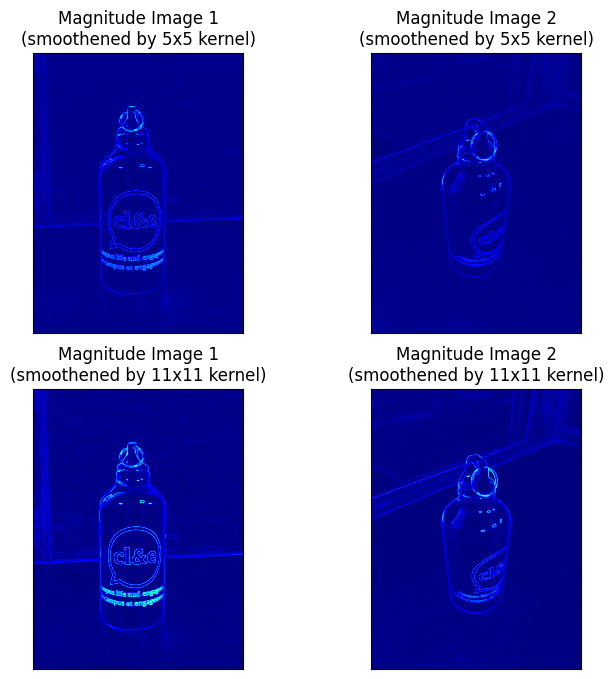

In [87]:
#plotting edge magnitude images in a 2x2 frame
fig5_1, ax5_1 = plt.subplots(2,2)
plt.setp(ax5_1, xticks=[], yticks=[])
fig5_1.set_size_inches(8, 8)
img_num = 0
for row in range(2):
  for col in range(2):
    ax5_1[row,col].imshow(magnitudes[img_num], cmap='jet')
    plot_title = "Magnitude Image {}\n(smoothened by {}x{} kernel)".format(col+1, k_sizes[row], k_sizes[row])
    ax5_1[row,col].set_title(plot_title)
    img_num += 1

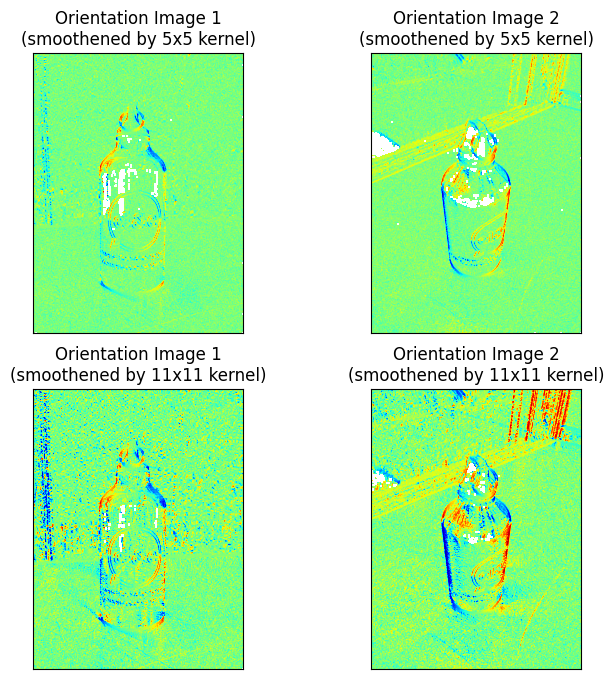

In [88]:
#plotting edge orientation images in a 2x2 frame
fig5_2, ax5_2 = plt.subplots(2,2)

fig5_2.set_size_inches(8, 8)
plt.setp(ax5_2, xticks=[], yticks=[])

img_num = 0
for row in range(2):
  for col in range(2):
    ax5_2[row,col].imshow(orientations[img_num], cmap='jet')
    plot_title = "Orientation Image {}\n(smoothened by {}x{} kernel)".format(col+1, k_sizes[row], k_sizes[row])
    ax5_2[row,col].set_title(plot_title)
    img_num += 1

## 6. Canny Edge Detection with opencv

In [89]:
#getting edges using Canny Edge Detection
edges1 = cv2.Canny(img1,100,200)
edges2 = cv2.Canny(img2,100,200)

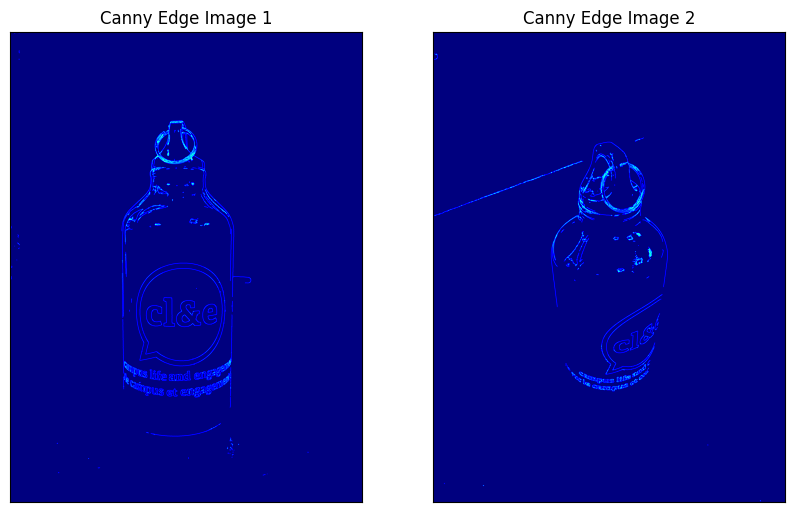

In [90]:
#plotting edge images side by side
fig6, ax6 = plt.subplots(1,2)

fig6.set_size_inches(10, 8)
plt.setp(ax6, xticks=[], yticks=[])
ax6[0].set_title("Canny Edge Image 1")
ax6[1].set_title("Canny Edge Image 2")

ax6[0].imshow(edges1, cmap='jet')
ax6[1].imshow(edges2, cmap='jet')